 # Introduction to Machine Learning: HW#1 

 ## *Kimia Montazeri*

***


## Problem 1: Python & Data Exploration
***
In this problem, we will compute some basic statistics and create visualizations of an example data set. First,
download the zip file for Homework 1, which contains some course code (the mltools directory) and the “Fisher
iris” data set introduced in lecture. Load the data into Python:

In [34]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1]   # target value (iris species) is the last column
X = iris[:,0:-1] # features are the other columns

The Iris data consist of four real-valued features used to predict which of three types of iris flower was measured
(a three-class classification problem).

1. __Use X.shape to get the number of features and the number of data points. Report both numbers, mentioning which number is which.__

In [35]:
X.shape

(148, 4)

*There are 148 data points and 4 features.*

2. __For each feature, plot a histogram ( plt.hist ) of the data values.__

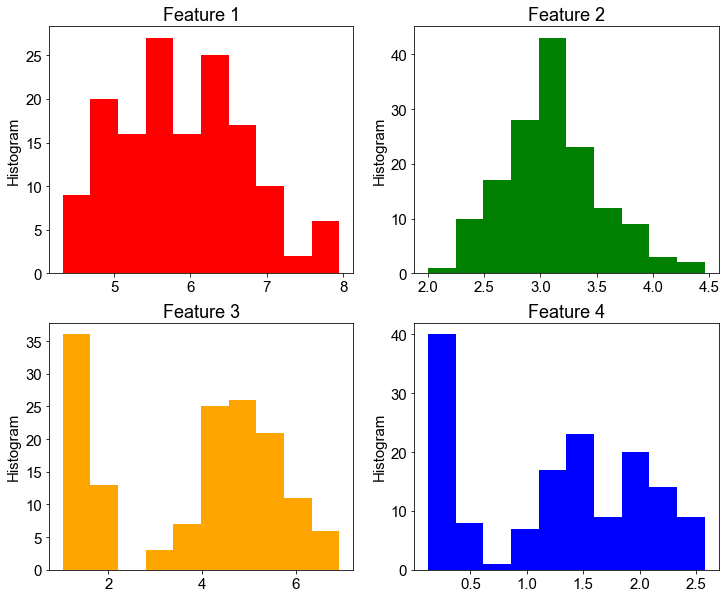

In [36]:
f = plt.figure(figsize=(12,10))
font = {'family':'arial', 'size':15}
plt.rc('font', **font)
plt.rc('xtick',labelsize = 15)
plt.rc('ytick',labelsize = 15)
color=['red' ,'green', 'orange', 'blue']

for i in range(4): 
    plt.subplot(2,2,i+1)
    plt.hist(X[:,i], color = color[i])
    plt.title('Feature %s' % (i+1))
    plt.ylabel('Histogram')


3. __Compute the mean & standard deviation of the data points for each feature ( np.mean , np.std ).__

In [37]:
for i in range(4): 
    print ('Feature %s: ' % (i+1))
    print ('Mean = ',np.mean(X[:,i]))
    print ('STD = ',np.std(X[:,i]))

Feature 1: 
Mean =  5.900103764189188
STD =  0.833402066774894
Feature 2: 
Mean =  3.098930916891892
STD =  0.43629183800107685
Feature 3: 
Mean =  3.8195548405405404
STD =  1.7540571093439352
Feature 4: 
Mean =  1.2525554845945945
STD =  0.7587724570263247


4. __For each pair of features (1,2), (1,3), and (1,4), plot a scatterplot (see plt.plot or plt.scatter ) of the feature values, colored according to their target value (class). (For example, plot all data points with y = 0 as blue, y = 1 as green, and y = 2 as red.)__

/Users/kimiamont/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


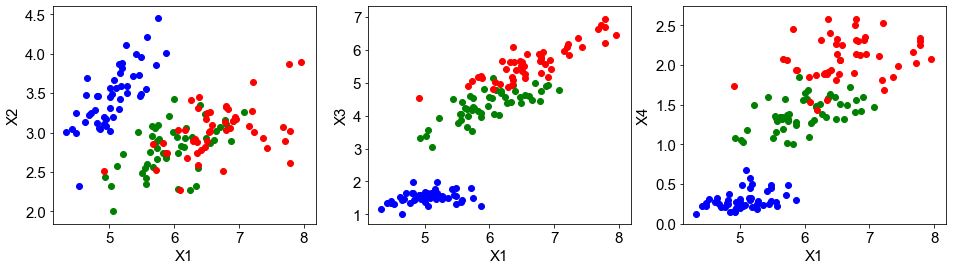

In [38]:
f = plt.figure(figsize=(16,4))

font = {'family':'arial', 'size':15}
plt.rc('font', **font)
plt.rc('xtick',labelsize = 15)
plt.rc('ytick',labelsize = 15)

colors=['blue' ,'green', 'red']

for j in range(3):
    for d in range(X.shape[0]):
        plt.subplot(1,3,j+1)
        cl=int(Y[d])
        plt.scatter(X[d,0],X[d,j+1], color = colors[cl])
        plt.ylabel('X%s' % (j+2))
        plt.xlabel('X1')


## Problem 2: k-nearest-neighbor predictions
***

1. __Modify the code listed above to use only the first two features of X (e.g., let X be only the first two columns of iris , instead of the first four), and visualize (plot) the classification boundary for varying values of K = [1, 5, 10, 50] using plotClassify2D .__

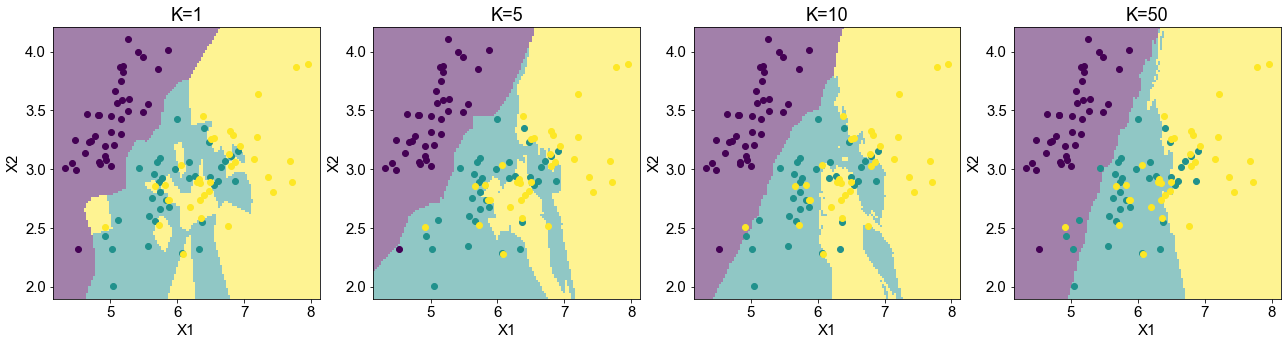

In [39]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) 
Y = iris[:,-1]   
X = iris[:,0:2] 


import mltools as ml

np.random.seed(0) 
X,Y = ml.shuffleData(X,Y); 
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);

f = plt.figure(figsize=(22,5))

for each, K in enumerate([1, 5, 10, 50]):
    knn = ml.knn.knnClassify()
    knn.train(Xtr, Ytr, K) 
    YvaHat = knn.predict(Xva) 
    plt.subplot(1,4,each+1)
    ml.plotClassify2D(knn, Xtr, Ytr );
    plt.title('K=%s' % K)
    plt.xlabel('X1')
    plt.ylabel('X2')
    

2. __Again using only the first two features, compute the error rate (number of misclassifications) on both the training and validation data as a function of K = [1, 2, 5, 10, 50, 100, 200]. You can do this most easily with a for-loop:__

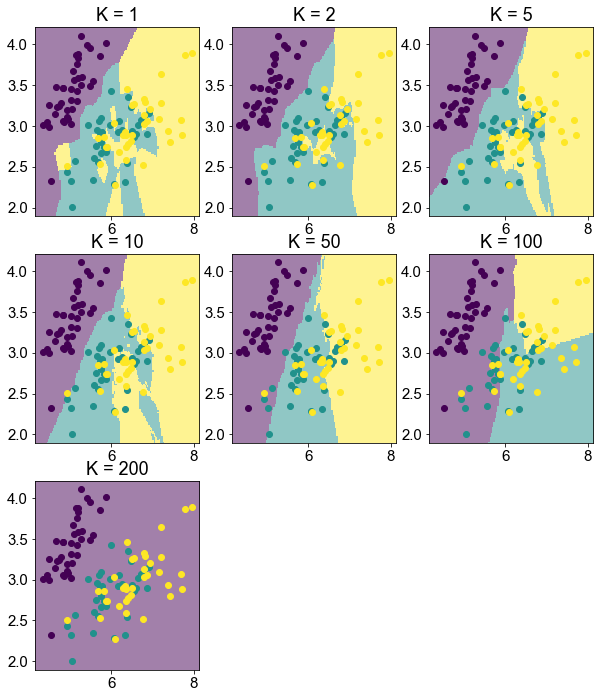

In [48]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) 
Y = iris[:,-1]   
X = iris[:,0:2] 

np.random.seed(0) 
X,Y = ml.shuffleData(X,Y); 
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);

K=[1,2,5,10,50,100,200];
errTrain = [None]*len(K) 
errValid = [None]*len(K) 

f = plt.figure(figsize=(10,16))

for i,k in enumerate(K):
    #On training data:
    KNN = ml.knn.knnClassify() 
    KNN.train(Xtr, Ytr, k) 
    Yhat = KNN.predict(Xtr)
    errTrain[i]=np.sum(np.abs(Yhat-Ytr))/float(Xtr.shape[0])
    
    #On validation data
    Yvahat = KNN.predict(Xva)
    errValid[i]= np.sum(np.abs(Yvahat-Yva))/float(Xva.shape[0])
    
    plt.subplot(4,3,i+1)
    ml.plotClassify2D(KNN, Xtr, Ytr);
    plt.title('K = %s' % k)



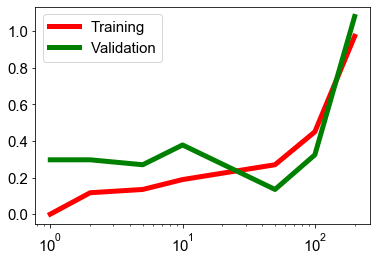

In [41]:
plt.semilogx(K,errTrain,color = 'red', linewidth=5)
plt.semilogx(K,errValid,color = 'green', linewidth=5)
plt.legend(['Training' ,'Validation'])

__Plot the resulting error rate functions using a semi-log plot ( semilogx ), with training error in red and
validation error in green. Based on these plots, what value of K would you recommend?__

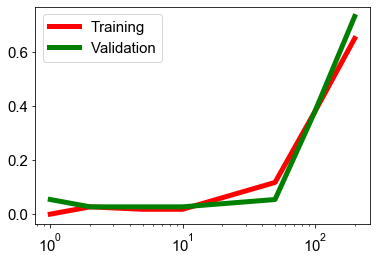

In [42]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) 
Y = iris[:,-1]   
X = iris[:,0:-1] 

np.random.seed(0) 
X,Y = ml.shuffleData(X,Y); 
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);

errTrain = [None]*len(K) 
errValid = [None]*len(K) 

for i,k in enumerate(K):
    #On training data:
    KNN = ml.knn.knnClassify() 
    KNN.train(Xtr, Ytr, k) 
    Yhat = KNN.predict(Xtr)
    YhWrong = Yhat != Ytr
    errTrain[i]=((np.sum(YhWrong))/(Xtr.shape[0]))
    
    #On validation data
    Yvahat = KNN.predict(Xva)
    YhvWrong= Yvahat != Yva
    errValid[i]=((np.sum(YhvWrong))/(Xva.shape[0]))

plt.semilogx(K,errTrain,color = 'red', linewidth=5)
plt.semilogx(K,errValid,color = 'green', linewidth=5)
plt.legend(['Training' ,'Validation'])


## Problem 3: Naïve Bayes Classifiers
***

1. __Compute all the probabilities necessary for a naïve Bayes classifier, i.e., the class probability p( y) and all the individual feature probabilities p(xi j y), for each class y and feature *xi.__

$$ p(y=1)=4/10 $$
$$ p(y=-1)=6/10 $$
***

   
|     $p(x_i=1|y=1)$   |    $p(x_i=0|y=1)$     |
|----------------------|-----------------------|
| $p(x_1=1|y=1) = 3/4$ | $p(x_1=0|y=1) = 1/4$  |
| $p(x_2=1|y=1) = 0/4$ | $p(x_2=0|y=1) = 4/4$  |
| $p(x_3=1|y=1) = 3/4$ | $p(x_3=0|y=1) = 1/4$  |
| $p(x_4=1|y=1) = 1/4$ | $p(x_4=0|y=1) = 3/4$  |
| $p(x_5=1|y=1) = 1/4$ | $p(x_5=0|y=1) = 3/4$  |

***

|    $p(x_i=1|y=-1)$    |    $p(x_i=0|y=-1)$     |
|-----------------------|------------------------|
| $p(x_1=1|y=-1) = 3/6$ | $p(x_1=0|y=-1) = 3/6$  |
| $p(x_2=1|y=-1) = 5/6$ | $p(x_2=0|y=-1) = 1/6$  |
| $p(x_3=1|y=-1) = 4/6$ | $p(x_3=0|y=-1) = 2/6$  |
| $p(x_4=1|y=-1) = 2/6$ | $p(x_4=0|y=-1) = 4/6$  |
| $p(x_5=1|y=-1) = 2/6$ | $p(x_5=0|y=-1) = 4/6$  |


2. __Which class would be predicted for x = (0 0 0 0 0)? What about for x = (1 1 0 1 0)?__

$$ p(y=1  | x=00000) = \frac{p(y = 1)\times p(x | y=1)}{p(x)} $$
$$ p(y=-1 | x=00000) = \frac{p(y = -1)\times p(x | y=-1)}{p(x)} $$
 ***

$$ p(x | y=1) = 1/4 \times 4/4 \times 1/4 \times 3/4 \times 3/4 = 0.03515625 $$
$$ p(x | y=-1) = 3/6 \times 1/6 \times 2/6 \times 4/6 \times 4/6 = 0.012345 $$
***
$$ p(y = 1) \times p(x | y = 1) = 0.0140625 $$ 
$$ p(y = -1) \times p(x | y = -1) = 0.0074 $$

*Class y = 1 will be predicted which means the email will be read.*

***

$$ p(y=1  | x=11010) = \frac{p(y = 1\times p(x | y=1)}{p(x)} $$
$$ p(y=-1 | x=11010) = \frac{p(y = -1)\times p(x | y=-1)}{p(x)} $$
 
***
$$ p(x | y=1) = 3/4 \times 0/4 \times 1/4 \times 1/4 \times 3/4 = 0 $$
$$ p(x | y=-1) = 3/6 \times 5/6 \times 2/6 \times 2/6 \times 4/6 =0.0308 $$

*Therefore, class y=-1 will be predicted and the email will be discarded.*

3. __Compute the posterior probability that y = +1 given the observation x = (0 0 0 0 0). Also compute the posterior probability that y = +1 given the observation x = (1 1 0 1 0).__


$$ p(x=00000 | y =1 ) = 1/4 \times 4/4 \times 1/4 \times 3/4 \times 3/4 = 0.03515625 $$
$$ p(x=11010 | y =1 ) = 3/4 \times 0/4 \times 1/4 \times 1/4 \times 3/4 = 0 $$

4. __Why should we probably not use a “joint” Bayes classifier (using the joint probability of the features x, as opposed to the conditional independencies assumed by naïve Bayes) for these data?__


*Because if "Joint" is used then the probability of some of the combinations would be zero becasue they never occur in the training data; Although they might be observed in the test data. In addition, the number of parameters would be $2^5$ and the number of data (m) is smaller than that.* 

5. __Suppose that before we make our predictions, we lose access to my address book, so that we cannot tell whether the email author is known. Do we need to re-train the model to classify based solely on the other four features? If so, how?__    
Hint: what parameters do I need for a naïve Bayes model over only features x2, . . . , x5? 
What, if anything, changes about the parameters or the way they are used?

$$ p(y = 1 | x_2 x_3 x_4 x_5) = \frac{p(y = 1)\times p(x_2 x_3 x_4 x_5 | y = 1)}{p(x)} $$

$$ p(x_2 x_3 x_4 x_5 | y) = p(x_2 | y )p(x_3 | y )p(x_4 | y )p(x_5 | y ) $$

$$ p(x) = p(x_2 x_3 x_4 x_5 | y = 1)p(y = 1) + p(x_2 x_3 x_4 x_5 | y = -1)p(y = -1) $$

*We do not need to re-train the model since the independance feature of the naïve Bayes is used. $p(x|y)$ will change since, it no longer has the $p(x_1|y)$ term multiplied by the other terms.*


## Problem 4: Gaussian Bayes Classifiers
***


1. __Splitting your training data by class, compute the empirical mean vector and covariance matrix of the data in each class. (You can use mean and cov for this.) Plot a scatterplot of the data, coloring each data point by its class, and use plotGauss2D to plot contours on your scatterplot for each class, i.e., plot a Gaussian contour for each class using its empirical parameters, in the same color you used for those data points.__

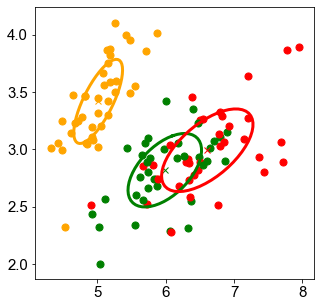

In [43]:
import sys
sys.path.append('/Users/kimiamont/Desktop/Machine Learning/ML Winter 2020/HW')
import mltools as ml


iris = np.genfromtxt("data/iris.txt",delimiter=None) 
Y = iris[:,-1]   
X = iris[:,0:2] 
np.random.seed(0) 
X,Y = ml.shuffleData(X,Y); 
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);


f = plt.figure(figsize=(5,5)) 
color =['orange', 'green', 'red']
for i in range(Xtr.shape[0]):
    cl = int(Ytr[i])
    plt.scatter(Xtr[i,0],Xtr[i,1], color = color[cl],s=50)
    
    
mean1=[None]*2 
mean2=[None]*2 
mean3=[None]*2 
f1 = Xtr[Ytr[:] == 0.0][:, :2].astype(np.float)
f2 = Xtr[Ytr[:] == 1.0][:, :2].astype(np.float)
f3 = Xtr[Ytr[:] == 2.0][:, :2].astype(np.float) #This is for slicing the data into different classes.
#f1.shape

mean1[0] = np.mean(f1[:,0])
mean1[1] = np.mean(f1[:,1])
var1 = np.cov(f1[:,0],f1[:,1])
#var1.shape

mean2[0] = np.mean(f2[:,0])
mean2[1] = np.mean(f2[:,1])
var2 = np.cov(f2[:,0],f2[:,1])

mean3[0] = np.mean(f3[:,0])
mean3[1] = np.mean(f3[:,1])
var3 = np.cov(f3[:,0],f3[:,1])

    
ml.plotGauss2D(mean1,var1, color ='orange',linewidth = 3)
ml.plotGauss2D(mean2,var2, color ='green',linewidth = 3)
ml.plotGauss2D(mean3,var3, color ='red',linewidth = 3)

2. __Visualize the classifier and its boundaries that result from applying Bayes rule, using__

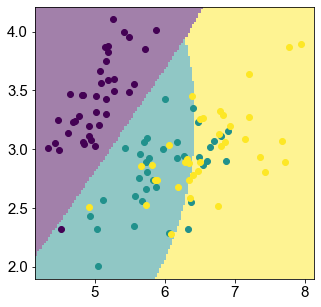

In [44]:
f = plt.figure(figsize=(5,5)) 
bc = ml.bayes.gaussClassify(Xtr, Ytr);
ml.plotClassify2D(bc, Xtr, Ytr);

3. __Compute the empirical error rate (number of misclassified points) on the training and validation data.__

In [45]:
GAUSS = ml.bayes.gaussClassify() 
GAUSS.train(Xtr, Ytr) 
#On training data
Yhat = GAUSS.predictSoft(Xtr)
YhWrong = Yhat != Ytr
errTrain=((np.sum(YhWrong))/(Xtr.shape[0]))
print ("Error rate on the training data = ",errTrain)

#On validation data
Yvahat = GAUSS.predictSoft(Xva)
YhvWrong= Yvahat != Yva
errValid=((np.sum(YhvWrong))/(Xva.shape[0]))
print ("Error rate on the validation data = ",errValid)

Error rate on the training data =  0.009009009009009009
Error rate on the validation data =  0.02702702702702703


/Users/kimiamont/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """
/Users/kimiamont/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


# Problem 5: Statement of Collaboration
***


I have not discussed or shared the homework questions and answers with anyone. I have used Stackoverflow and online forums to get help with some of the Python commands. 
***
*Kimia Montazeri*

01/16/2020